In [1]:
from shapely.geometry import Point
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import geopandas as gpd

loading may data - pickle and csv


In [2]:
%%time
may_loc = pd.read_pickle("../data/may.pkl")
may_trip = pd.read_csv("../data/may_trip.csv")

Wall time: 3.92 s


In [3]:
may_trip['pubTimeStamp'] = pd.to_datetime(may_trip['pubTimeStamp'])


This section makes a dictionary of dataframes. The dataframes can be "chunked up" into different time segments. The main things you need to adjust: the start and end variables, and the delta variable, which designates how "big" a "time chunk" should be.

In [4]:
#make a list of datetimes with datetime function 
start = datetime(2019, 5, 26, 0, 0)
end = datetime(2019, 5, 27, 0, 0)
delta = timedelta(days=1)
timelist = []
timenamelist = []
while start <= end:
    timelist.append(start)
    timenamelist.append(start.strftime("%Y-%m-%d-%H-%M"))
    start += delta
# print(timelist)
# print(timenamelist)

In [5]:
#goal of function: using list of time frames, in this case, days, make a dataframe containing
#info about the location for each scooter, for each day


#make dictionary of dataframes using base dataframe and a user-defined segments_of_time_list
#from cell above
def make_day_df(datetime_list, timenames_list, dataframe, colname):
    resultslist = {} #turn into dictionary
    x = 0
    y = 1
    z = 0
    while x in range(0,len(datetime_list)-1):
        starttime = datetime_list[x]
        endtime = datetime_list[y]
        mask = (dataframe[colname] > starttime) & (dataframe[colname] <= endtime)
        framename = dataframe.loc[mask]
        x += 1
        y += 1
        print(x)
        resultslist[timenames_list[z]] = framename
        z += 1
    return resultslist
        
the_output = make_day_df(timelist, timenamelist, may_trip,"pubTimeStamp")


1


In [6]:
the_output.keys()

dict_keys(['2019-05-26-00-00'])

I'm interested in May 26th specifically, the Saturday of Memorial Day weekend, since it had the most scooter rides.

In [7]:
the_output['2019-05-26-00-00']
# the_output['2019-05-01-00-00']['sumdid'].nunique()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
176114,2019-05-26 00:00:11.587,Lyft,LFT1,Powered707225,3.878200,314.96064,2019-05-25 00:00:00,23:56:18.766666,2019-05-26 00:00:00,00:00:11.460000,36.148090,-86.810720,36.147870,-86.810880,"[[36.14809,-86.81072],[36.14805,-86.81075],[36...",2019-05-27 08:27:20.343000
176115,2019-05-26 00:00:24.110,Lyft,LFT2,Powered763535,30.441050,4908.13664,2019-05-25 00:00:00,23:29:57.500000,2019-05-26 00:00:00,00:00:23.963333,36.158920,-86.777250,36.153800,-86.783980,"[[36.15892,-86.77725],[36.15901,-86.77723],[36...",2019-05-27 08:27:20.380000
176116,2019-05-26 00:00:41.747,Lyft,LFT3,Powered759730,18.248550,8182.41496,2019-05-25 00:00:00,23:42:26.736666,2019-05-26 00:00:00,00:00:41.650000,36.153780,-86.784050,36.162240,-86.779540,"[[36.15378,-86.78405],[36.15452,-86.78459],[36...",2019-05-27 08:27:20.420000
176117,2019-05-26 00:01:06.000,Bolt Mobility,BOL00985,Powered-ae44754d-5be7-0c96-4f4f-d106dc6b05ab,567.000000,6102.36000,2019-05-25 00:00:00,23:48:50,2019-05-25 00:00:00,23:58:17,36.149060,-86.806547,36.156050,-86.790311,"[[""36.149060"",""-86.806547""],[""36.149050"",""-86....",2019-05-27 05:59:24.830000
176118,2019-05-26 00:01:06.000,Bolt Mobility,BOL00987,Powered-40d728a6-1adb-3e5b-e813-5040890b64b5,1609.000000,16656.82000,2019-05-25 00:00:00,23:32:38,2019-05-25 00:00:00,23:59:27,36.154707,-86.785128,36.155181,-86.786919,"[[""36.154707"",""-86.785128""],[""36.154709"",""-86....",2019-05-27 05:59:24.897000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191193,2019-05-26 23:59:03.500,Lyft,LFT2878,Powered938052,19.499717,3904.19960,2019-05-26 00:00:00,23:39:33.406666,2019-05-26 00:00:00,23:59:03.390000,36.164010,-86.771450,36.160620,-86.774840,"[[36.16401,-86.77145],[36.16409,-86.7713],[36....",2019-05-27 08:29:05.093000
191194,2019-05-26 23:59:09.507,Lyft,LFT2879,Powered963751,2.989867,790.68244,2019-05-26 00:00:00,23:56:10,2019-05-26 00:00:00,23:59:09.393333,36.154320,-86.784740,36.152430,-86.783840,"[[36.15432,-86.78474],[36.1543,-86.78469],[36....",2019-05-27 08:29:05.123000
191195,2019-05-26 23:59:32.867,Lyft,LFT2880,Powered658939,48.169433,16259.84304,2019-05-26 00:00:00,23:11:22.580000,2019-05-26 00:00:00,23:59:32.746666,36.163660,-86.769230,36.160490,-86.775160,"[[36.16366,-86.76923],[36.16361,-86.76921],[36...",2019-05-28 08:15:36.263000
191196,2019-05-26 23:59:33.527,Lyft,LFT2881,Powered490647,15.444733,5593.83220,2019-05-26 00:00:00,23:44:06.750000,2019-05-26 00:00:00,23:59:33.433333,36.149350,-86.798080,36.152170,-86.795010,"[[36.14935,-86.79808],[36.14942,-86.7981],[36....",2019-05-28 08:15:36.300000


In [8]:
the_output['2019-05-26-00-00']['sumdID'].value_counts()
# the_output['2019-05-01-00-00']['sumdid'].nunique()

PoweredUNKNOWN          158
PoweredNRVJKLPRUQ7BI     22
PoweredNPIQBPS757EHG     21
PoweredODIJQ7CYI4BHL     21
PoweredFTMUQQPAHOWBB     19
                       ... 
PoweredDSLMP              1
PoweredPL5KM              1
Powered27579              1
Powered1C6W5              1
Powered658939             1
Name: sumdID, Length: 3879, dtype: int64

What I'd like to do is return only the Scooter IDs that had less than 3 rides on this day. Then be able to plot those points to see where they are clustered, because that would tell us where we can reduce the scooter density.

In [9]:
the_output['2019-05-26-00-00']['sumdID'].value_counts().loc[lambda x : x<3]

PoweredW6ZIU            2
PoweredW8BN3            2
Powered6M6BIVIDG7AB7    2
PoweredBHE6Q            2
PoweredUZXB4            2
                       ..
PoweredDSLMP            1
PoweredPL5KM            1
Powered27579            1
Powered1C6W5            1
Powered658939           1
Name: sumdID, Length: 1499, dtype: int64

So now we can see that on 5/26/19, 3878 (subtracting the row for unknowns) unique scooter IDs had rides. Of those 3878 scooters, 1499 only had 1 or 2 rides (not meeting the 3 rides per day threshold). So only 61% of scooters on this day had 3 or more rides.

I'm also curious to know what percentage of scooters are over-performing though. For instance, how many scooters are being used for at least 6 rides per day (twice the stated goal)?

In [10]:
the_output['2019-05-26-00-00']['sumdID'].value_counts().loc[lambda x : x>5]

PoweredUNKNOWN          158
PoweredNRVJKLPRUQ7BI     22
PoweredNPIQBPS757EHG     21
PoweredODIJQ7CYI4BHL     21
PoweredFTMUQQPAHOWBB     19
                       ... 
Powered603412             6
PoweredPOUWU7US5N3FP      6
Powered2QTOFIQINRR6M      6
PoweredXUL56SIELSIYR      6
PoweredSEOA4HTDBKRQS      6
Name: sumdID, Length: 863, dtype: int64

So 862 unique scooters had twice (or more) the stated rides-per-day goal on this particular day. That's 22% of the scooters.

May 26th was the busiest day of the month, and the Saturday of a holiday weekend... but what about just a regular weekday? Since the aim of this project is supposed to be about getting scooters used by regular Nashville residents, let's see what the data shows us. For May, the median number of rides per day occured on May 16th. So let's run the same process for that day - what percentage of scooters had fewer than the goal of 3 rides per day, and what percentage of scooters had 6 rides or more (twice the stated goal)?

In [11]:
#make a list of datetimes with datetime function 
start = datetime(2019, 5, 16, 0, 0)
end = datetime(2019, 5, 17, 0, 0)
delta = timedelta(days=1)
timelist = []
timenamelist = []
while start <= end:
    timelist.append(start)
    timenamelist.append(start.strftime("%Y-%m-%d-%H-%M"))
    start += delta
# print(timelist)
# print(timenamelist)

In [12]:
#goal of function: using list of time frames, in this case, days, make a dataframe containing
#info about the location for each scooter, for each day


#make dictionary of dataframes using base dataframe and a user-defined segments_of_time_list
#from cell above
def make_day_df(datetime_list, timenames_list, dataframe, colname):
    resultslist = {} #turn into dictionary
    x = 0
    y = 1
    z = 0
    while x in range(0,len(datetime_list)-1):
        starttime = datetime_list[x]
        endtime = datetime_list[y]
        mask = (dataframe[colname] > starttime) & (dataframe[colname] <= endtime)
        framename = dataframe.loc[mask]
        x += 1
        y += 1
        print(x)
        resultslist[timenames_list[z]] = framename
        z += 1
    return resultslist
        
the_output = make_day_df(timelist, timenamelist, may_trip,"pubTimeStamp")


1


In [13]:
the_output.keys()

dict_keys(['2019-05-16-00-00'])

In [15]:
the_output['2019-05-16-00-00']
# the_output['2019-05-01-00-00']['sumdid'].nunique()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
93181,2019-05-16 00:02:13.453,Lyft,LFT1,Powered938154,9.314300,5859.58024,2019-05-15 00:00:00,23:52:54.483333,2019-05-16 00:00:00,00:02:13.343333,36.16124,-86.78494,36.15180,-86.78417,"[[36.16124,-86.78494],[36.16133,-86.78504],[36...",2019-05-17 17:13:03.513000
93182,2019-05-16 00:02:16.093,Lyft,LFT2,Powered806743,12.068167,8553.14988,2019-05-15 00:00:00,23:50:11.886666,2019-05-16 00:00:00,00:02:15.976666,36.16033,-86.77564,36.14548,-86.79282,"[[36.16033,-86.77564],[36.16028,-86.77574],[36...",2019-05-17 17:13:03.547000
93183,2019-05-16 00:02:21.057,Lyft,LFT3,Powered437467,10.370450,2690.28880,2019-05-15 00:00:00,23:51:58.716666,2019-05-16 00:00:00,00:02:20.943333,36.15971,-86.77992,36.16007,-86.77317,"[[36.15971,-86.77992],[36.15971,-86.77986],[36...",2019-05-17 17:13:03.580000
93184,2019-05-16 00:02:39.433,Lyft,LFT5,Powered626167,13.016367,9025.59084,2019-05-15 00:00:00,23:49:38.283333,2019-05-16 00:00:00,00:02:39.263333,36.16034,-86.77685,36.14546,-86.79266,"[[36.16034,-86.77685],[36.1602,-86.77672],[36....",2019-05-17 17:13:03.650000
93185,2019-05-16 00:02:41.020,Lyft,LFT6,Powered251861,12.167017,8500.65644,2019-05-15 00:00:00,23:50:30.886666,2019-05-16 00:00:00,00:02:40.906666,36.16017,-86.77623,36.14548,-86.79265,"[[36.16017,-86.77623],[36.16013,-86.77618],[36...",2019-05-17 17:13:03.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97732,2019-05-16 23:59:16.003,Bird,BRD2499,PoweredKJSKW,4.000000,2624.67200,2019-05-16 00:00:00,23:56:18.543333,2019-05-17 00:00:00,00:00:09.516666,36.16040,-86.77510,36.15480,-86.77480,"[[36.160351,-86.775028],[36.154864,-86.774738]]",2019-05-18 05:30:18.250000
97733,2019-05-16 23:59:16.003,Bird,BRD2495,PoweredUNKNOWN,0.000000,0.00000,2019-05-16 00:00:00,23:59:09.083333,2019-05-16 00:00:00,23:59:19.866666,36.16140,-86.77750,36.16140,-86.77750,[],2019-05-18 05:30:18.120000
97734,2019-05-16 23:59:16.003,Bird,BRD2496,Powered2ZSZE,4.000000,2959.31768,2019-05-16 00:00:00,23:57:09.720000,2019-05-17 00:00:00,00:01:04.803333,36.17830,-86.79020,36.17150,-86.78570,"[[36.178265,-86.790047],[36.178265,-86.790039]...",2019-05-18 05:30:18.153000
97735,2019-05-16 23:59:16.003,Bird,BRD2500,Powered4TCGH,5.000000,1640.42000,2019-05-16 00:00:00,23:55:22.840000,2019-05-17 00:00:00,00:00:19.566666,36.16260,-86.77770,36.16080,-86.77880,"[[36.162796,-86.777749],[36.160911,-86.777488]...",2019-05-18 05:30:18.283000


In [16]:
the_output['2019-05-16-00-00']['sumdID'].value_counts()
# the_output['2019-05-01-00-00']['sumdid'].nunique()

PoweredIOZGHYOGSO7HK    28
PoweredSDQ6GAHIJK5AF    28
Powered5VHFZMDPGBWD5    27
PoweredEE2HRZ3ZRFM5O    27
PoweredJ7LPOP2NKDWYU    27
                        ..
PoweredTSXEH             1
Powered224310            1
Powered794954            1
Powered72PTV             1
Powered5I3DR             1
Name: sumdID, Length: 1665, dtype: int64

In [17]:
the_output['2019-05-16-00-00']['sumdID'].value_counts().loc[lambda x : x<3]

PoweredIFR8I      2
PoweredJXM5N      2
Powered668125     2
PoweredSXRSH      2
Powered9050644    2
                 ..
PoweredTSXEH      1
Powered224310     1
Powered794954     1
Powered72PTV      1
Powered5I3DR      1
Name: sumdID, Length: 1153, dtype: int64

So out of 1665 unique scooters that ran on 5/16/19, 1153 of them had fewer than 3 rides. So only 31% of the scooters met the threshold of 3 rides that day.

In [19]:
the_output['2019-05-16-00-00']['sumdID'].value_counts().loc[lambda x : x>5]

PoweredIOZGHYOGSO7HK    28
PoweredSDQ6GAHIJK5AF    28
Powered5VHFZMDPGBWD5    27
PoweredEE2HRZ3ZRFM5O    27
PoweredJ7LPOP2NKDWYU    27
                        ..
PoweredCKT7IMUCI7EVD     6
Powered861765            6
Powered924486            6
Powered590962            6
Powered889438            6
Name: sumdID, Length: 137, dtype: int64

137 scooters, or 8%, performed well with at least 6 rides that day.

This section below is experimental geospatial stuff, adapted from our geospatial notebook for the most part. IF you want to mess with this bit, make sure you load the notebook in the geospatial enivronment.

In [9]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
# promise_zones= promise_zones.to_crs('EPSG:4326')
print(promise_zones)

epsg:2274
   OBJECTID  ZONE_ID    SHAPE_STAr     SHAPE_STLe  \
0         1        1  1.053728e+08   49364.601403   
1         2        2  7.670585e+07   45226.018917   
2         3        3  2.985488e+08   75207.067487   
3         4        4  2.713638e+08   74348.596054   
4         5        5  3.928178e+08  106661.712102   
5         6        6  9.535996e+07   59256.923574   

                                            geometry  
0  POLYGON ((1743366.812 678044.543, 1743367.698 ...  
1  POLYGON ((1738690.545 661791.347, 1738733.644 ...  
2  POLYGON ((1759602.544 668309.889, 1759640.155 ...  
3  POLYGON ((1747799.003 654974.612, 1747821.293 ...  
4  POLYGON ((1737013.744 692634.639, 1737122.605 ...  
5  POLYGON ((1716935.654 667534.495, 1716992.481 ...  


<AxesSubplot:>

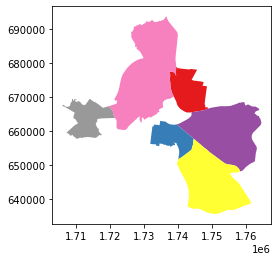

In [10]:
promise_zones.plot(cmap='Set1')

In [9]:
# zipcodes = gpd.read_file('../../da5-geospatial-python-workshop-derektprice/data/zipcodes.geojson')
# print(zipcodes.crs)
# zipcodes.head( )

In [10]:
#adding geomtery column with lambda and point
the_output['2019-05-01-00-00']['geometry'] = the_output['2019-05-01-00-00'].apply(lambda x: Point(x['longitude'], 
                                                         x['latitude']), axis=1)
the_output['2019-05-01-00-00'].head(3)

C:\Users\saram\AppData\Local\Temp/ipykernel_9148/1316813279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_output['2019-05-01-00-00']['geometry'] = the_output['2019-05-01-00-00'].apply(lambda x: Point(x['longitude'],


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.799877 36.136822)
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,POINT (-86.77294500000001 36.191252)
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,POINT (-86.806293 36.144752)


In [11]:
#made a geodf
one_hour_geodf = gpd.GeoDataFrame(the_output['2019-05-01-00-00'],
                           crs = promise_zones.crs,
                           geometry = the_output['2019-05-01-00-00']['geometry'])
one_hour_geodf.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.79988 36.13682)
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,POINT (-86.77295 36.19125)
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,POINT (-86.80629 36.14475)
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,POINT (-86.77469 36.16206)
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,POINT (-86.78311 36.15097)


In [12]:
#spatial join
may_1_1AM_geodf = gpd.sjoin(one_hour_geodf, promise_zones, op="within")
may_1_1AM_geodf.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe


In [13]:
#number of 
may_1_1AM_geodf['ZONE_ID'].value_counts()

Series([], Name: ZONE_ID, dtype: int64)